# BREAST CANCER PREDICTION USING SUPPORT VECTOR MACHINE

### Author : Helana Kuriakose

# Problem

Evaluate the Breast cancer dataset and predict the cell is whether in the benign stage or malignant stage of Breast cancer.

# WorkFlow

##### 1)	Data collection 

##### 2)    Data Pre-processing

##### 3)	Train – Test data

##### 4)	Model Training

##### 5)	Model Evaluation

##### 6)	Making Prediction

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Data collection and pre-processing

In [2]:
cell_df = pd.read_csv('F:\python\cancer_data.csv')

In [3]:
cell_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
cell_df.shape

(569, 33)

In [6]:
cell_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
# check the memory size in bytes

cell_df.size

18777

In [8]:
# getting the features

cell_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
# to know the frequency of items in a particular attribute

cell_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

 B -> Benign, 
 M -> Malignant

# Handling missing values

In [10]:
cell_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Handling duplicate values

Now we are going to plot the dataframe to find the distribution of class.  

In [11]:
# checking the duplicate values

cell_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [12]:
cell_df.duplicated().sum()

0

# Exploring dataset using plots

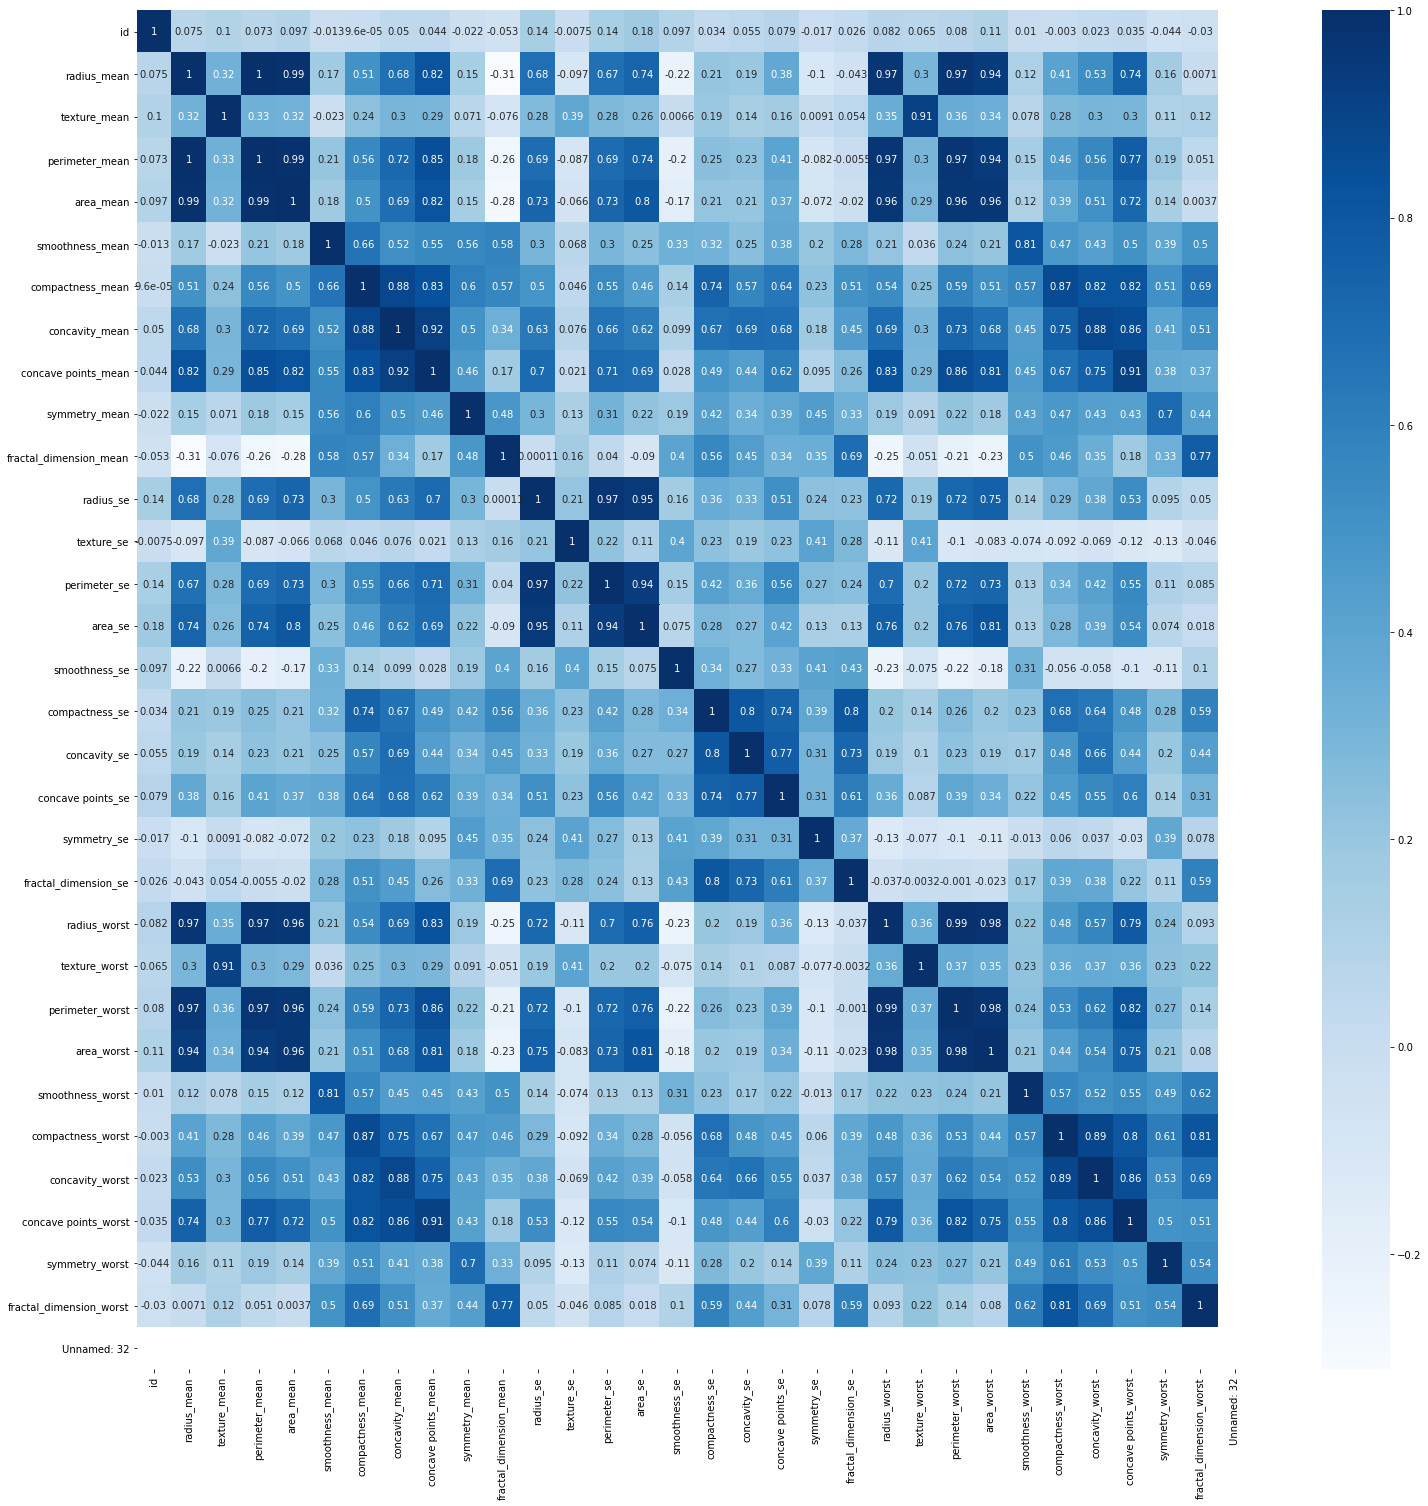

In [13]:
# heatmap

plt.figure(figsize=(25,25))
sb.heatmap(cell_df.corr(),annot=True, cmap = 'Blues')

In [14]:
# scatter plot
# seperate the values from the particular attribute

benign_df = cell_df[cell_df['diagnosis']=='B'][0:50]
malignant_df = cell_df[cell_df['diagnosis']=='M'][0:50]

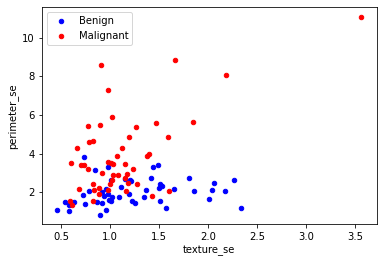

In [15]:
# plot

axes = benign_df.plot(kind = 'scatter', x = 'texture_se', y = 'perimeter_se', color = 'blue', label = 'Benign')
malignant_df.plot(kind = 'scatter', x = 'texture_se', y = 'perimeter_se', color = 'red', label = 'Malignant', ax = axes)

Now dividing the dataset into dependent(target) and independent variables.

In [16]:
x = cell_df.iloc[:,np.r_[2:32]]

In [17]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Label encoder

We are changing the categorical value into numerical value.

In [18]:
y = cell_df['diagnosis'].apply(lambda y_value : 1 if y_value=='M' else 0)

In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

# Train - Test split

In [20]:
# splitting the dataset into train and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [21]:
# cheching the train and test data size

print("x size :",x.shape)
print("x-train size :",x_train.shape)
print("x_test size :",x_test.shape)
print("y size :",y.shape)
print("y-train size :",y_train.shape)
print("y_test size :",y_test.shape)

x size : (569, 30)
x-train size : (455, 30)
x_test size : (114, 30)
y size : (569,)
y-train size : (455,)
y_test size : (114,)


# Model training

## Support Vector Machine

In [22]:
from sklearn.svm import SVC
SVClassifier = SVC(kernel = 'linear', gamma = 'auto')
SVClassifier.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear')

In [23]:
# prediction

y_pred_svc = SVClassifier.predict(x_test)

## Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(x_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred_log = regression.predict(x_test)

# Model evaluation

In [26]:
# accuracy_score

from sklearn.metrics import accuracy_score
testing_accuracy_svc = round(accuracy_score(y_pred_svc, y_test)*100,3)
print("Accuracy score of Test data in SVM model :",testing_accuracy_svc)

Accuracy score of Test data in SVM model : 97.368


In [27]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_pred_svc, y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [28]:
testing_accuracy_log = round(accuracy_score(y_pred_log, y_test)*100,4)
print("Accuracy score of Test data in Logistic regression :",testing_accuracy_log)

Accuracy score of Test data in Logistic regression : 95.614


In [29]:
# classification report

print(classification_report(y_pred_log, y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        71
           1       0.90      1.00      0.95        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# Building a predictive model

In [30]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# changing the input data into a numpy array

input_data_as_array = np.asarray(input_data)

# reshape the input data as we are predicting the label only for single instance

input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = SVClassifier.predict(input_data_reshaped)
if (prediction[0]==1):
    print("The cell is Cancerous")
else:
    print("The cell is not cancerous")

The cell is not cancerous
